In [4]:
!pip install nltk
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 355.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 8.4 MB/s eta 0:00:00a 0:00:01


In [5]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 789.4 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 19.3 MB/s eta 0:00:00a 0:00:01


In [9]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 17.3 MB/s eta 0:00:0000:0100:01


In [13]:
!pip install contractions
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 8.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.3 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 15.7 MB/s eta 0:00:00


In [14]:
import os
from similarity import similarity
import nltk
nltk.download('wordnet')
nltk.download('brown')
import numpy as np
import time
from create_dataset import full_dataset
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jadeynfeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/jadeynfeng/nltk_data...
[nltk_data]   Package brown is already up-to-date!


['number right hand air brake line needs replacing'
 '- air conditioner fault' 'diagnose / repair fuel fault'
 'broken left hand side mirror' '- HMU hose weeping'
 'compressor oil pressure switch unserviceable' 'ground fault in propel'
 'steering hub caps require replacing' 'centrifugal oil filter leaking'
 'radiator blocked with grass' '- ripper shank broken'
 'voltage regulator fuse fault' 'crack in windscreen' 'blown brake hose'
 'middle air drain tap leaking' 'cutting edges need change out'
 'right hand PTO cavity emptying' 'cracks in diagonal braces in front'
 'coolant leak' 'repair fuel fault' '- repair leaking centrifugal filter'
 'air horn not working compressor awaiting' 'collect broken tooth'
 'oil leak at diverter valve' 'grease pump is bypassing air'
 '- brake hose needs to be replaced' 'air horn disconnected'
 'repair air conditioner and wiring fault' 'boarding ladder not working'
 'air conditioner belt broken'
 'repair cracked roof skin left hand side exhaust' 'broken gre

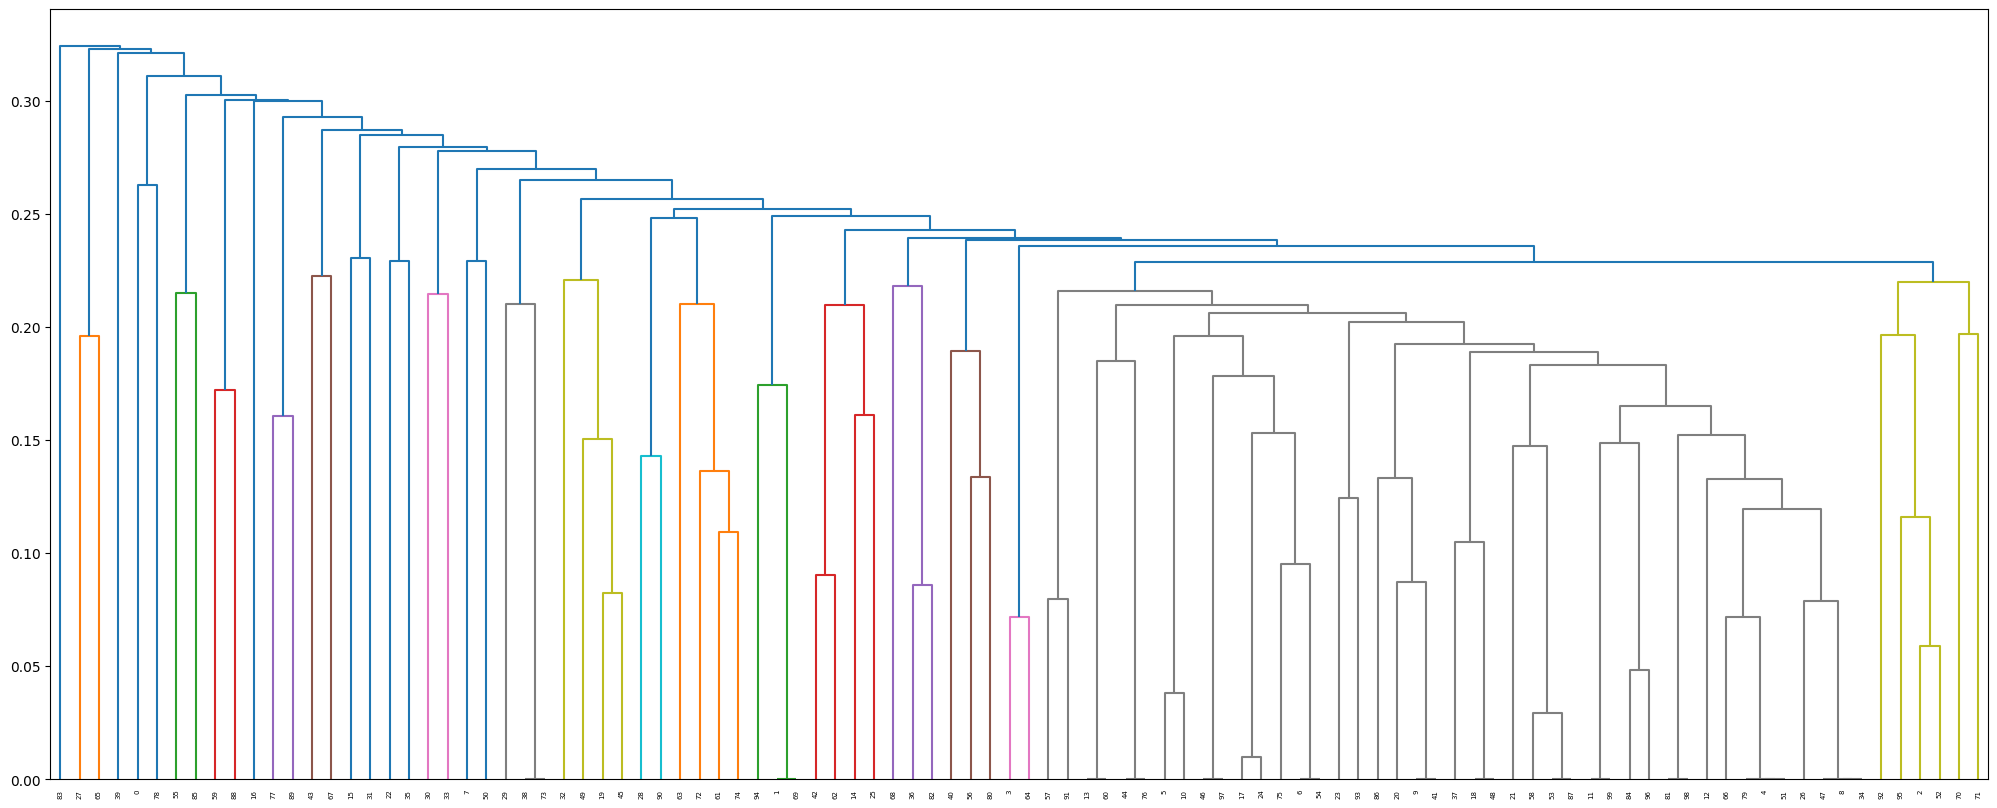

In [15]:
start = time.time()

simList = []

dataset = full_dataset("../data/gold_release.json")
np.random.seed(42)
random_sampled_dataset = np.random.choice(dataset, 100, replace=False)
print(random_sampled_dataset)
similarity_matrix=[]
for i in range(0,len(random_sampled_dataset)):
    for j in range(i+1, len(random_sampled_dataset)):
        sentList1=random_sampled_dataset[i]
        sentList2=random_sampled_dataset[j]
        sim = similarity(sentList1,sentList2)
        
        # print(sentList1,"&",sentList2)
        # print(sim)
        similarity_matrix.append(sim)
    print(i/len(random_sampled_dataset)*100,"% done")

# Calculate execution time
end = time.time()
dur = end-start
print("")
if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")


Z = linkage(similarity_matrix, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

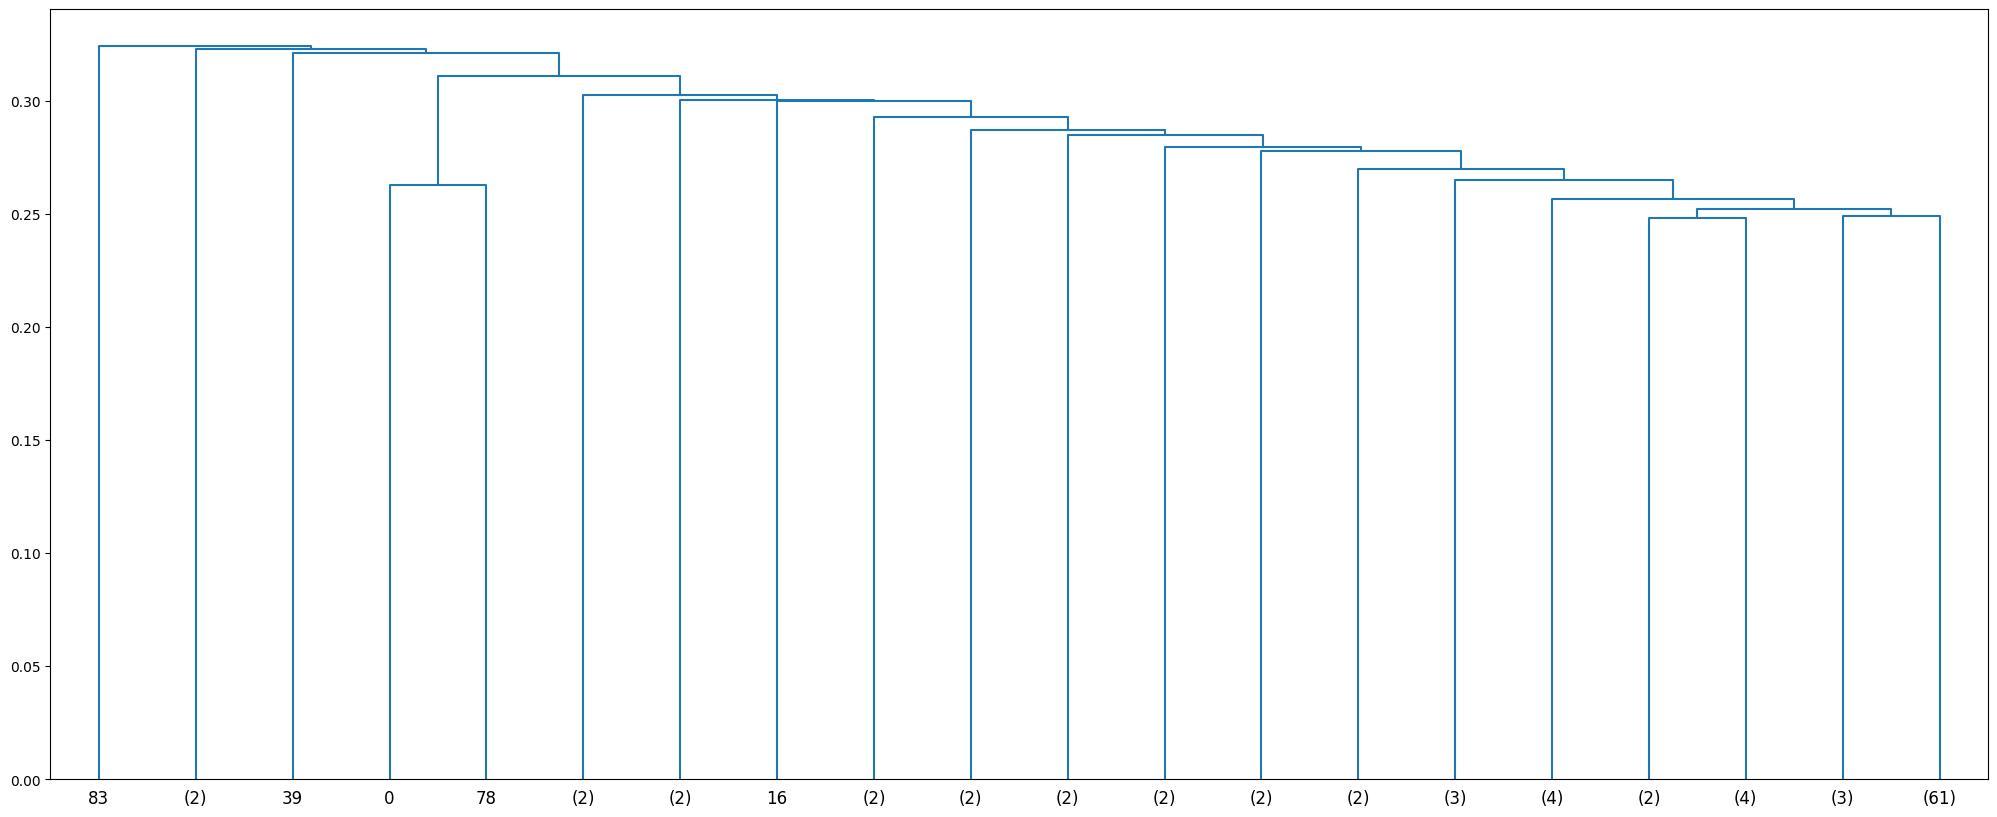

In [18]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, p=20, truncate_mode='lastp')
plt.show()

In [27]:
from scipy.cluster.hierarchy import fcluster
k=20
cluster_labels = fcluster(Z, k, criterion='maxclust')
for i in range(1,k+1):
    print("Cluster",i,":")
    for j in range(len(cluster_labels)):
        if cluster_labels[j]==i:
            print(random_sampled_dataset[j])
    print()


Cluster 1 :
repair air conditioner and wiring fault
left hand rear brake cooling hose leaking

Cluster 2 :
number right hand air brake line needs replacing

Cluster 3 :
change out leaking implement pump

Cluster 4 :
cracks in back right hand side handrail
change out leaking relay valve

Cluster 5 :
repair crack in rear cross member
brake cooling return hose leaking

Cluster 6 :
air horn not working
- repair engine oil leaking

Cluster 7 :
change position flat tyre
broken fuel cooler mounts

Cluster 8 :
cutting edges need change out
broken grease plug

Cluster 9 :
collect broken tooth
movement found right hand engine mount

Cluster 10 :
repair cracked roof skin left hand side exhaust
cooler return pipe coupling leak

Cluster 11 :
steering hub caps require replacing
boarding gate hinge broken

Cluster 12 :
air conditioner belt broken
brake release fault
replace leaking scavenge pump

Cluster 13 :
repair fuel fault
broken clamp on crowd cylinder hose TBC
generator flow regulator unservice

In [29]:
counter = 0
for i in range(len(random_sampled_dataset)):
    for j in range(i, len(random_sampled_dataset)): 
        print(random_sampled_dataset[i],"&", random_sampled_dataset[j])
        print(similarity_matrix[counter])
        counter += 1
        print()


number right hand air brake line needs replacing & number right hand air brake line needs replacing


IndexError: invalid index to scalar variable.